In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
df = pd.read_csv("C:\\Users\\JAY\\Desktop\\Credit Card\\data_credit_card_customer_seg.csv")

In [3]:
df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [4]:
print("Mean: "+str(round(df['MINIMUM_PAYMENTS'].mean(), 2)))
df['MINIMUM_PAYMENTS'] = df['MINIMUM_PAYMENTS'].fillna(round(df['MINIMUM_PAYMENTS'].mean(), 2))

Mean: 864.21


In [5]:
print("Mean: "+str(round(df['CREDIT_LIMIT'].mean(), 2)))
df['CREDIT_LIMIT'] = df['CREDIT_LIMIT'].fillna(round(df['CREDIT_LIMIT'].mean(), 2))

Mean: 4494.45


In [6]:
del df['CUST_ID']
df.shape

(8950, 17)

Visualizing Data

<AxesSubplot:>

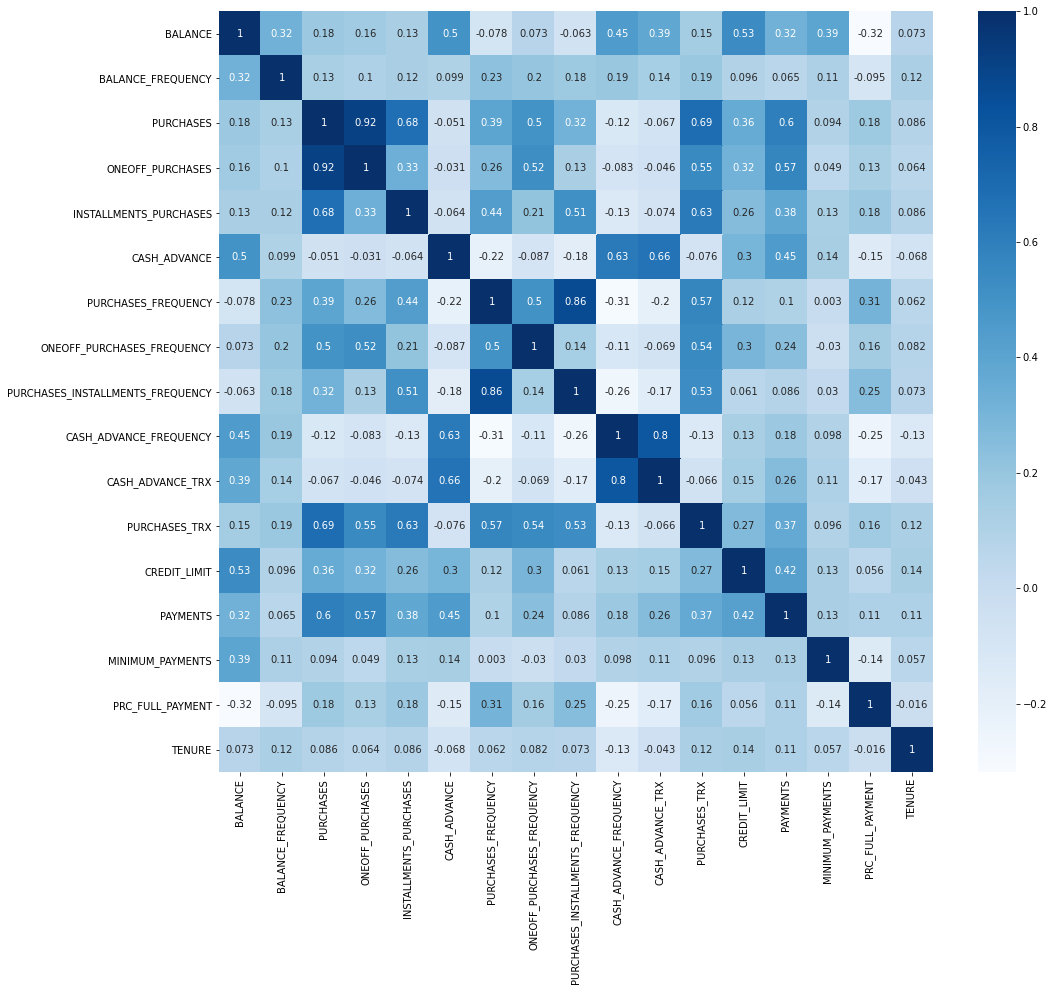

In [7]:
plt.figure(figsize=(16,14))
sns.heatmap(df.corr(),cmap='Blues',annot=True)

Inference- 
1. "PURACHASES_INSTALLMENTS_FREQUENCY" has strong positive correlation with "PURCHASE FREQUENCY"
2. "BALANCE" has a strong negative correlation with "PRC_FULL_PAYMENT"
3. "TENURE" has almost no correlation with any (No linear relationship)

Purchases and OneOff_purchase have positve correlation of 0.92 PURCHASES_FREQUENCY and PURCHASES_INSTALLMENT_FREQUENCY 0.86 CASH_ADVANCE_TRX and CASH_ADVANCE_FREQUENCY has positive correlatuion of 0.8

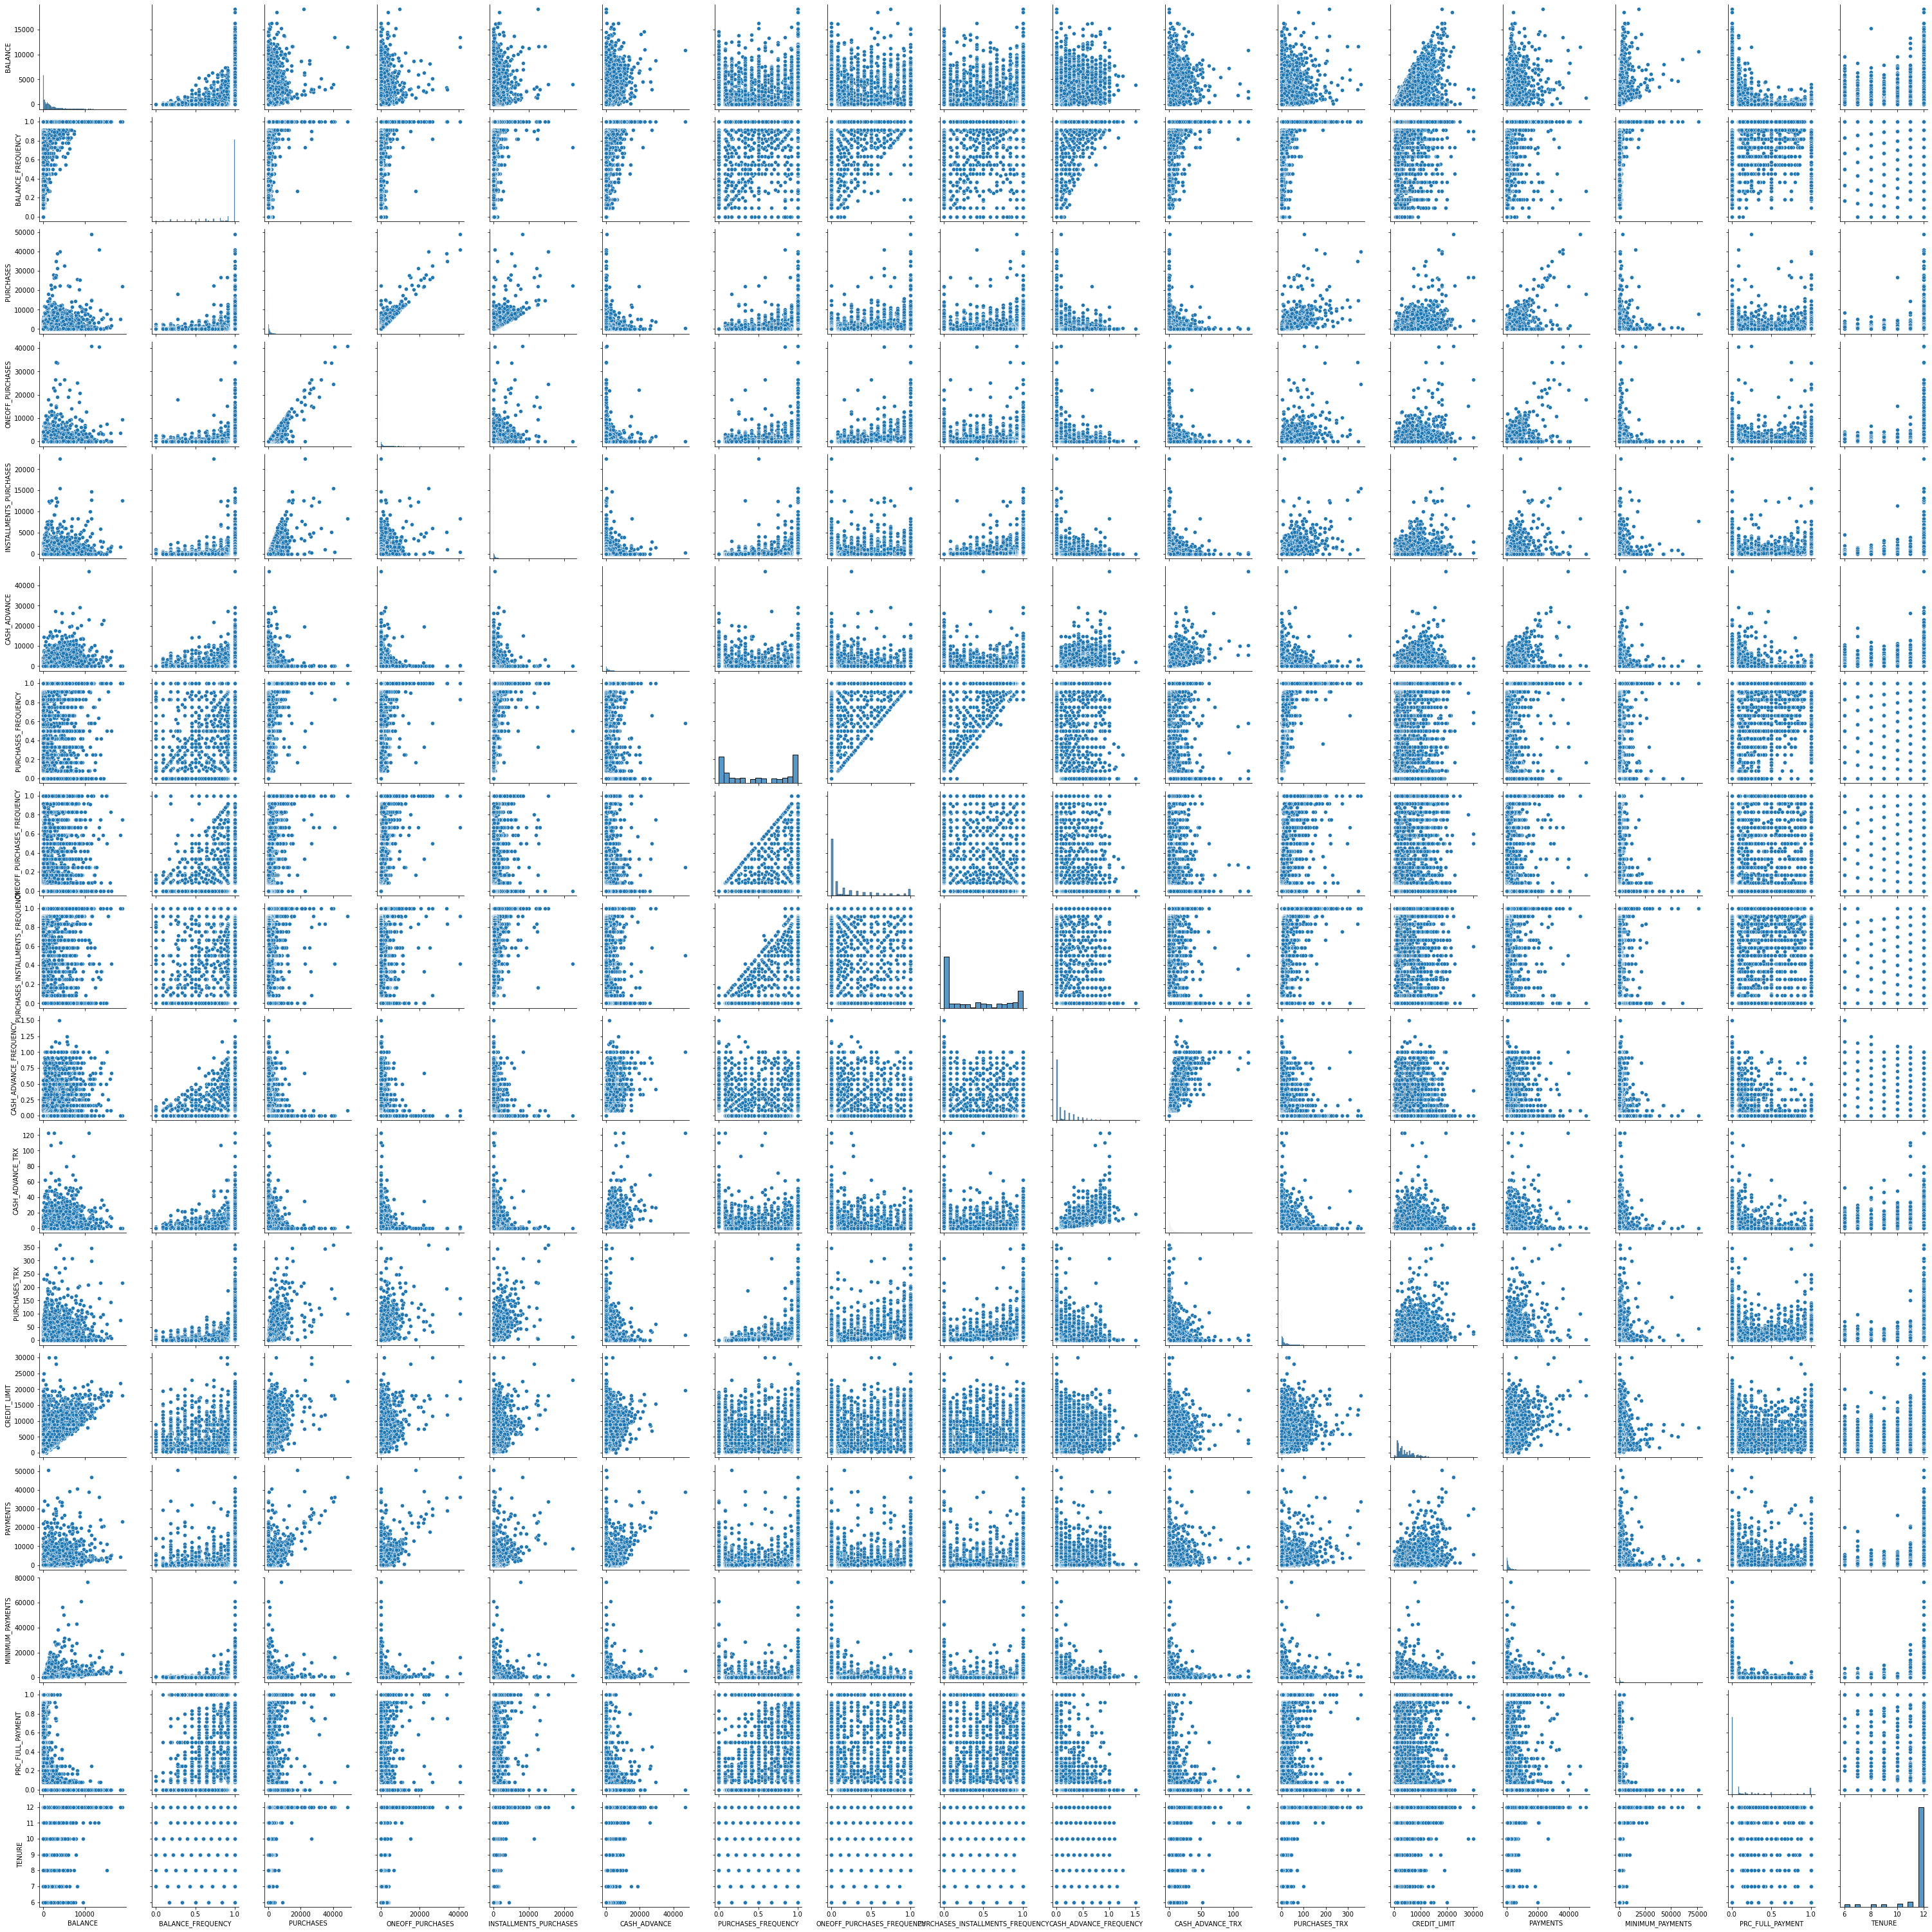

In [8]:
sns.pairplot(df)

No outliers in "PURCHASES_FREQUENCY" and "PURCHASES_INSTALLMENTS_FREQUENCY"

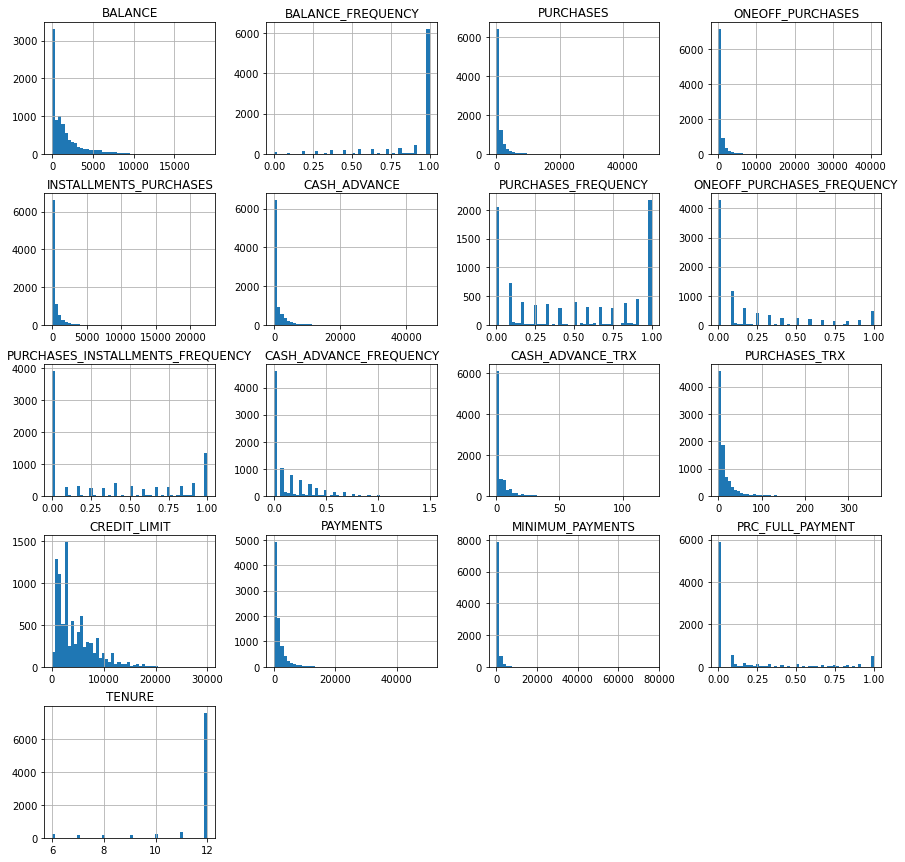

In [9]:
df.hist(bins=50, figsize=(15,15))
plt.show()

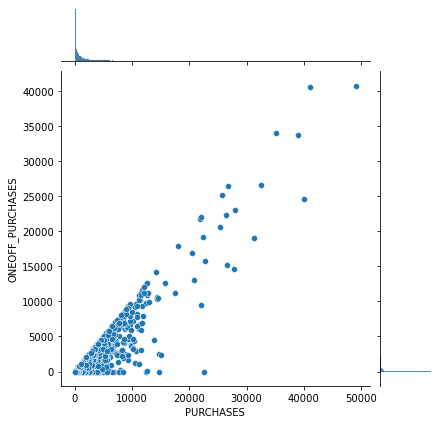

In [10]:
sns.jointplot(x='PURCHASES', y='ONEOFF_PURCHASES', data=df)
plt.show()

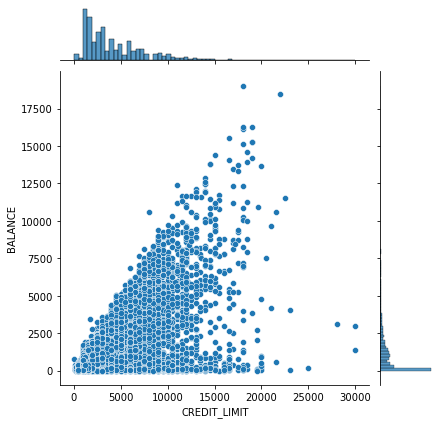

In [11]:
sns.jointplot(x='CREDIT_LIMIT', y='BALANCE', data=df)

CREDIT_LIMIT & BALANCE are in a linear relation with each other ie. if a customer's balance increases, his/her credit limit shall increase & vice-versa

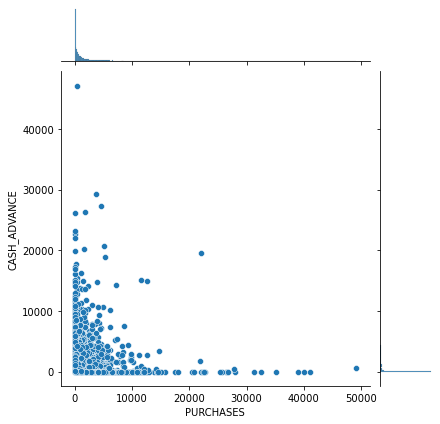

In [12]:
sns.jointplot(x='PURCHASES', y='CASH_ADVANCE', data=df)

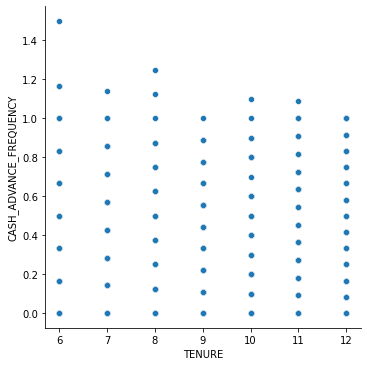

In [13]:
sns.relplot(x='TENURE',y='CASH_ADVANCE_FREQUENCY',data=df)

1. Old customers(with tenure=12) have cash adv freq less than one
2. New customers(tenure 6-11) take cash advance more frequently

In [14]:
plt.figure(figsize=(10,5))
px.scatter(df, x='TENURE', y='CREDIT_LIMIT', color='TENURE')

<Figure size 720x360 with 0 Axes>

With increase in TENURE, CREDIT_LIMIT increases

In [15]:
df['TOTAL_TXN'] = df['PURCHASES_TRX'] + df['CASH_ADVANCE_TRX']
df['TOTAL_TXN'].describe()

count    8950.000000
mean       17.958659
std        25.338356
min         0.000000
25%         4.000000
50%        10.000000
75%        21.000000
max       358.000000
Name: TOTAL_TXN, dtype: float64

In [16]:
df['TOTAL_TXN'].value_counts()

1      816
2      596
12     558
3      472
4      451
      ... 
274      1
242      1
186      1
170      1
199      1
Name: TOTAL_TXN, Length: 184, dtype: int64

In [17]:
df['AVERAGE_CASH_ADVANCE'] = df['CASH_ADVANCE']/df['TENURE']

In [18]:
df['AVERAGE_CASH_ADVANCE']

0         0.000000
1       536.912124
2         0.000000
3        17.149001
4         0.000000
           ...    
8945      0.000000
8946      0.000000
8947      0.000000
8948      6.093130
8949     21.173335
Name: AVERAGE_CASH_ADVANCE, Length: 8950, dtype: float64

Since sum of ONEOFF_PURCHASES & INSTALLMENTS_PURCHASES = PURCHASES, we may delete those 2 cols.